## **Traditional (Syndrome Decoding)**

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading codebook file

Loading codebook file from the generated codewords and we separate the data to codeword and message.

In [2]:
def load_codebook(fname):
  df = pd.read_csv(fname)
  y = df[["x0", "x1", "x2", "x3", "x4", "x5", "x6"]].values
  m = df[["m0", "m1", "m2", "m3"]].values
  file_size = y.shape[0]
  return y, m, file_size

# Hard decision

After we receive the signal, we first do the hard decision. If the signal is greater than the threshold, we say it is 1 and if the signal is smaller than the threshold it is 0.

In [3]:
def hard_decision(y):
  d = np.zeros(y.shape)
  d[y>=0.0] = 1.0
  d[y<0.0] = 0
  return d

# Syndrome Decoding

We use the defined H to find out the syndrome of each codeword. After error correction, we can get the recoevered message.

In [4]:
def syndrome_decode(d):
    # define the parity check matrix H
    H = np.array([[1, 1, 0, 1, 1, 0, 0],
                  [1, 0, 1, 1, 0, 1, 0],
                  [0, 1, 1, 1, 0, 0, 1]])
    # get the syndrome
    s = d.dot(H.T) %2
    # build a mapping function between syndrome and error pattern
    syndrome_to_error = {(0, 0, 0): [0, 0, 0, 0, 0, 0, 0],
                         (0, 0, 1): [0, 0, 0, 0, 0, 0, 1],
                         (0, 1, 0): [0, 0, 0, 0, 0, 1, 0],
                         (0, 1, 1): [0, 0, 1, 0, 0, 0, 0],
                         (1, 0, 0): [0, 0, 0, 0, 1, 0, 0],
                         (1, 0, 1): [0, 1, 0, 0, 0, 0, 0],
                         (1, 1, 0): [1, 0, 0, 0, 0, 0, 0],
                         (1, 1, 1): [0, 0, 0, 1, 0, 0, 0]}
    # get the codeword from the received signal r_hat and error pattern e_hat
    # get the message m_hat from the codeword
    # Get the error pattern from the syndrome
    # print(s)
    e_hat=[]
    for item in s:
      e_hat.append(syndrome_to_error[tuple(item)])
    # Correct the received message by applying the error pattern
    m_hat = (d + e_hat) % 2
    result = [row[:4] for row in m_hat]  #取前四個'
    return result


# Performance Evaluation

We go through all signals to calculate the bit error rate.

P.S. output the number of elements of error bits

In [5]:
def calculate_error(m_hat, m):  
    # print(m_hat)
    # print(m)
    block_err = 0
    bit_err=0;

    for i in range(len(m)):
      berr=False
      for j in range(len(m[i])):
        if(m[i][j]!=m_hat[i][j]):
          bit_err+=1
          berr=True
        if(berr):
          block_err+=1
    return block_err, bit_err


0 / 8
1 / 8
2 / 8
3 / 8
4 / 8
5 / 8
6 / 8
7 / 8
8 / 8


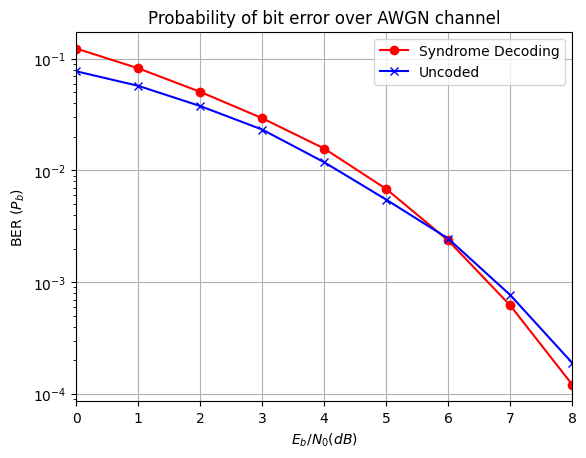

Bit Error Rate: [1.233750e-01 8.212500e-02 5.056250e-02 2.937500e-02 1.572500e-02
 6.843750e-03 2.365000e-03 6.212500e-04 1.216875e-04]


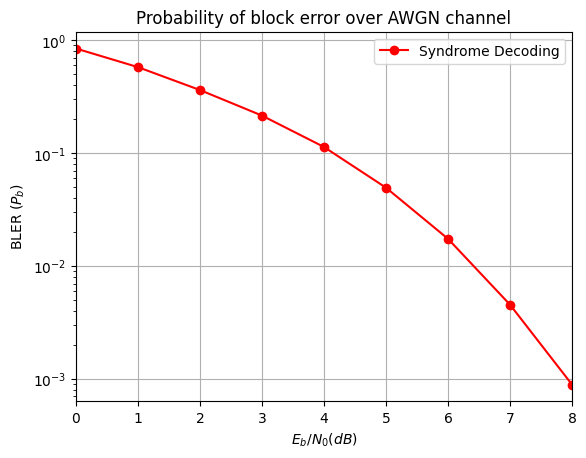

Symbol Error Rate: [0.8455     0.57825    0.3625     0.21525    0.113475   0.049485
 0.01744    0.0045525  0.00089275]


In [7]:
# SNR setting
SNR_start = 0
SNR_end = 8
step_size = 1
SNR = np.arange(SNR_start,SNR_end+1,step_size)
length_SNR = len(SNR)
BLER = np.zeros(length_SNR)
BER = np.zeros(length_SNR)
# main
for i in range(length_SNR):
  fname = "codeword_file/codeword_file_SNR="+str(SNR[i])+".csv"

  # type your own code (apply the defined function)

  # load codeword
  y,m,file_size=load_codebook(fname)
  # hard decision
  d=hard_decision(y)
  # syndrome decoding
  m_hat=syndrome_decode(d)
  # calculate error
  block_err,bit_err=calculate_error(m_hat, m)

  
  BER[i] = bit_err/4.0/file_size
  BLER[i] = block_err/file_size
  print(i,"/",len(SNR)-1)
# Fig Plot
# Compare with uncoded
BER_uncoded = [0.07721, 0.05723, 0.03774, 0.02324, 0.01186, 0.00549, 0.00246, 0.00077, 0.00019]
EbN0dBs = np.arange(start=SNR_start,stop=SNR_end+1,step=step_size)
fig1 = plt.figure()
plt.semilogy(EbN0dBs,BER,color='r',marker='o',linestyle='-',label='Syndrome Decoding')
plt.semilogy(EbN0dBs,BER_uncoded,color='b',marker='x',linestyle='-',label='Uncoded')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BER ($P_b$)')
plt.title('Probability of bit error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Bit Error Rate:", BER)
fig2 = plt.figure()
plt.semilogy(EbN0dBs,BLER,color='r',marker='o',linestyle='-',label='Syndrome Decoding')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BLER ($P_b$)')
plt.title('Probability of block error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Symbol Error Rate:", BLER)
#print("Your name and the date you demo.")